# Chapter 6 LLN and CLT

In [1]:
import random
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.linalg import inv, sqrtm

**The CLT refines the LLN.**

**The LLN gives conditions under which sample moments converge to population moments as sample size increases.**

**The CLT provides informations about the rate at which sample moments converge to population moments as sample size increases.**

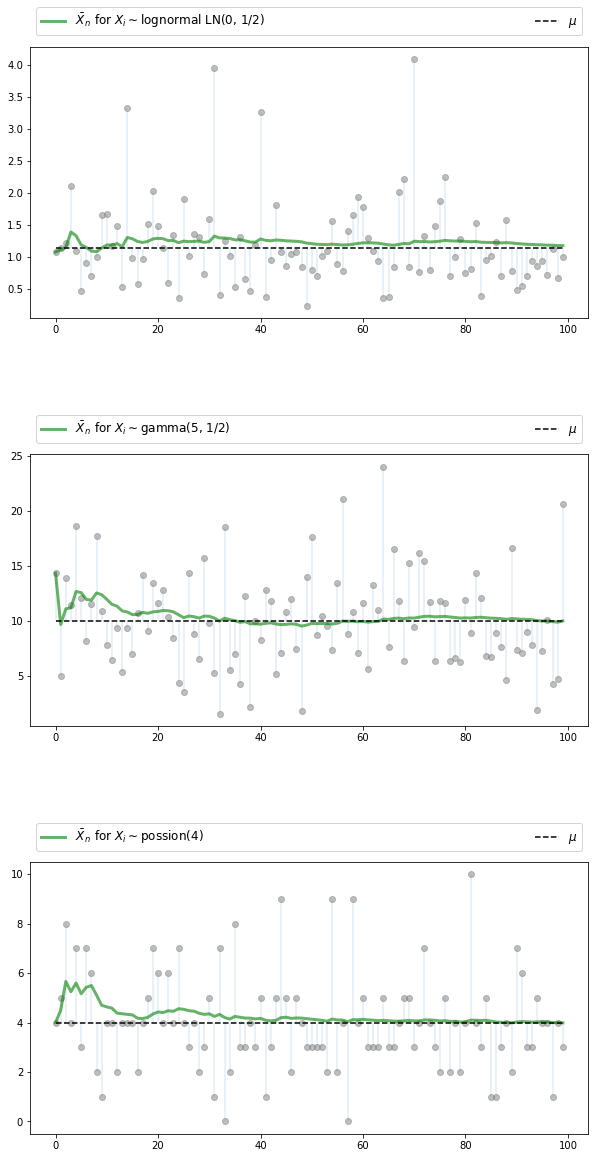

In [2]:
# Illustration of LLN
n = 100
distributions = {"student's t with 10 degrees of freedom": t(10), 
"beta(2, 2)": beta(2, 2),
"lognormal LN(0, 1/2)": lognorm(0.5), 
"gamma(5, 1/2)": gamma(5, scale=2), 
"possion(4)": poisson(4), 
"exponential with lambda = 1": expon(1)}

num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 20))

bbox = (0., 1.02, 1., 0.102)
legend_args = {'ncol': 2,
'bbox_to_anchor': bbox,
'loc': 3,
'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)

    data = distribution.rvs(n)

    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])

    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar X_n$ for $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m]*n, 'k--', lw=1.5, label='$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.show()

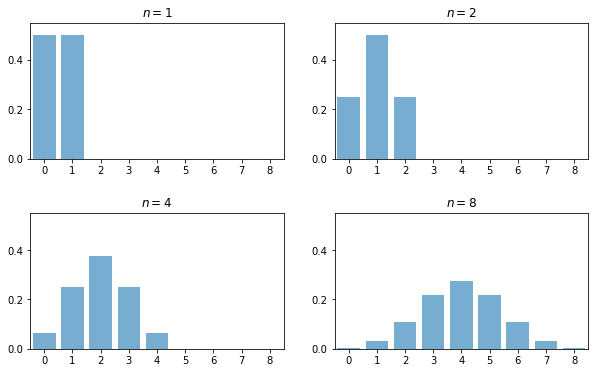

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55), xticks=list(range(9)), yticks=(0, 0.2, 0.4), title=f'$n = {n}$')

plt.show()

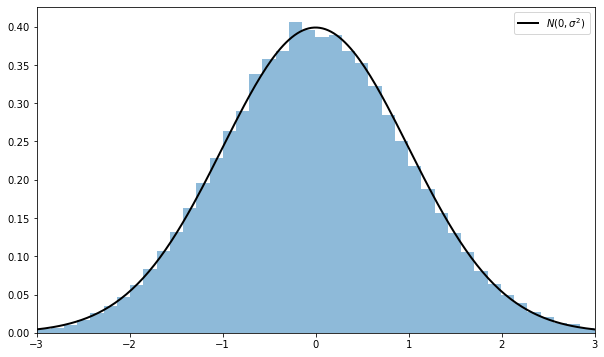

In [6]:
n = 1000
k = 100000
distribution = expon(2)
mu, s = distribution.mean(), distribution.std()

data = distribution.rvs((k, n))
sample_means = data.mean(axis=1)
Y = np.sqrt(n) * (sample_means - mu)

fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()
plt.show()

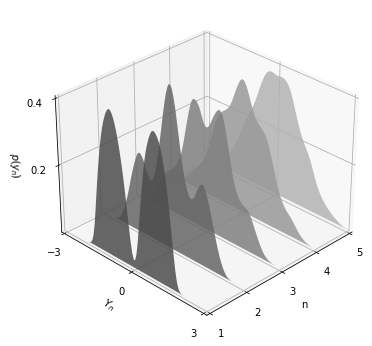

In [12]:
beta_dist = beta(2, 2)

def gen_x_draws(k):
    bdraws = beta_dist.rvs((3, k))
    bdraws[0, :] -= 0.5
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    js = np.random.randint(0, 2, size=k)
    X = bdraws[js, np.arange(k)]
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))

Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)
S = Z.cumsum(axis=1)
Y = (1 / np.sqrt(ns)) * S

fig = plt.figure(figsize=(10, 6))
ax = plt.gca(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs)
greys = np.linspace(0.3, 0.7, nmax)
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])
    ys = density(xs)
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')
ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$', zlabel='$p(y_n)$', xlabel=("n"),
yticks=((-3, 0, 3)), ylim3d=(a, b), zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
ax.view_init(30, 45)
plt.show()

## Exercise 1

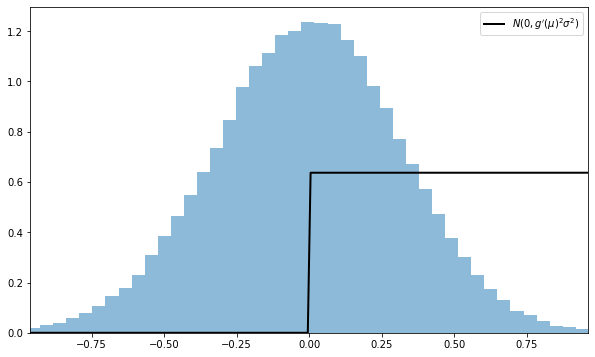

In [22]:
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi / 2))
mu, s = distribution.mean(), distribution.std()

g = np.sin
g_prime = np.cos

data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1)
error_obs = np.sqrt(n) * (g(sample_means) - g(mu))

asymptotic_sd = g_prime(mu) * s
fig, ax = plt.subplots(figsize=(10, 6))
xmin = -3 * g_prime(mu) * s
xmax = -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = "$N(0, g'(\mu)^2 \sigma^2)$"
# ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.plot(xgrid, uniform.pdf(xgrid, loc=0, scale=(np.pi / 2)), 'k-', lw=2, label=lb)
ax.legend()
plt.show()